#**Task 1: Build a Random Forest Classifier**

In this task, I developed a Random Forest model to classify whether a telecom customer is likely to churn. I also applied GridSearch for tuning and analyzed key feature importances.

In [47]:
!pip install tensorflow
!pip install pandas scikit-learn matplotlib seaborn tensorflow

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Drop unique identifier
df.drop(columns=['customerID'], inplace=True)

# Encode target
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# One-hot encode categorical features
df = pd.get_dummies(df)

# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                           cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluation on test set
y_pred = best_model.predict(X_test)

print("Classification Metrics on Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validation score
cv_score = cross_val_score(best_model, X, y, cv=5, scoring='f1')
print(f"Cross-validated F1 Score: {cv_score.mean():.4f} ± {cv_score.std():.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Classification Metrics on Test Set
Accuracy: 0.765791341376863
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      1036
           1       0.80      0.15      0.26       373

    accuracy                           0.77      1409
   macro avg       0.78      0.57      0.56      1409
weighted avg       0.77      0.77      0.70      1409

Cross-validated F1 Score: 0.2596 ± 0.0152


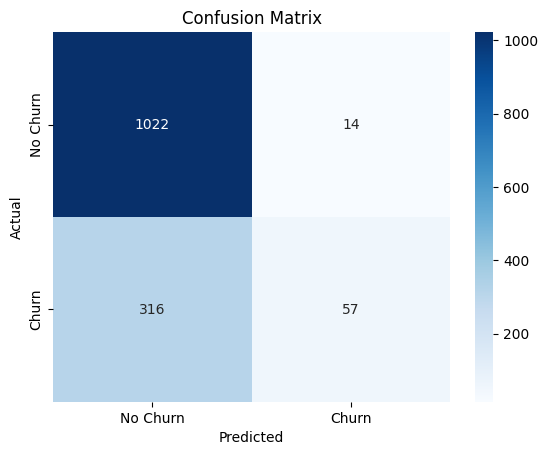

In [49]:
# Plot the Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

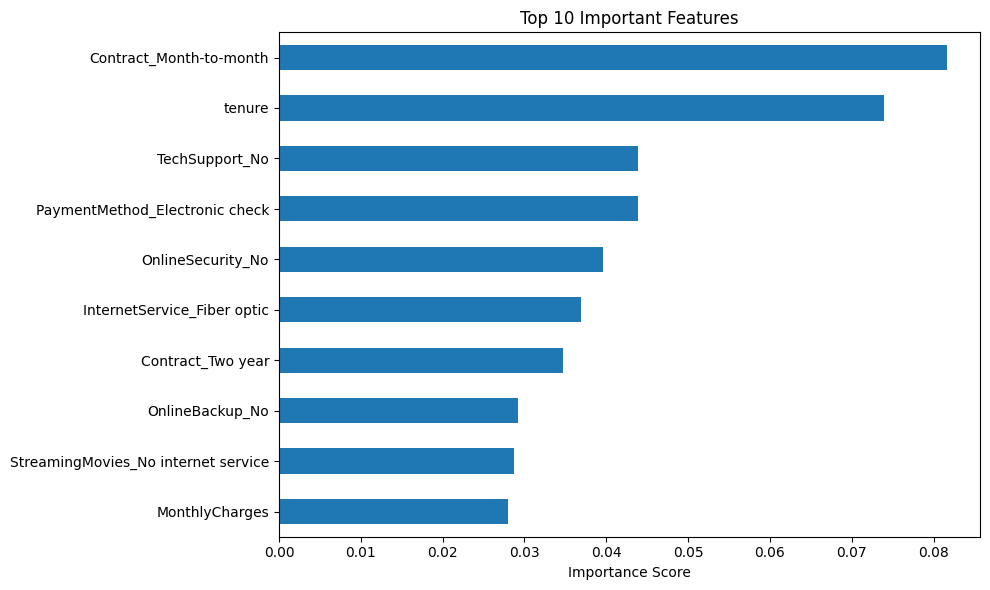

In [50]:
# Feature importance analysis
importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

# Plot feature importance
top_features.plot(kind='barh', title="Top 10 Important Features", figsize=(10, 6))
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

#**Task 2: Support Vector Machine (SVM) for Classification**

Here, I trained Support Vector Machine models with different kernels (linear & RBF) to classify Iris flower species. The results were evaluated with accuracy, precision, and AUC, along with visual decision boundaries.

SVM (Linear Kernel)
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

AUC: 1.0


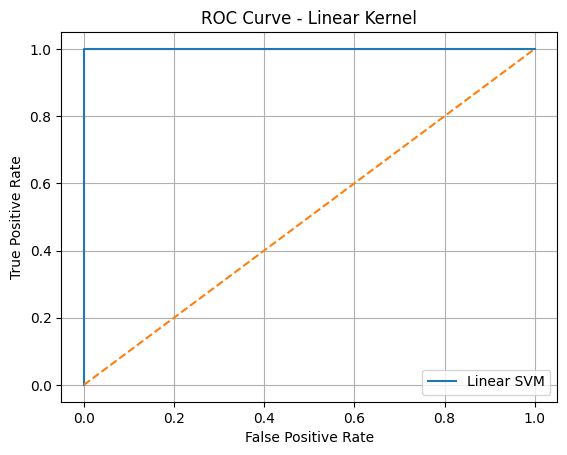

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import numpy as np

# Load the dataset
iris = load_iris(as_frame=True)
df = iris.frame[iris.target != 2]  # Use Setosa and Versicolor
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['target']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, y_train)

# Predict
y_pred = svm_linear.predict(X_test)
y_prob = svm_linear.predict_proba(X_test)[:, 1]

# Evaluation
print("SVM (Linear Kernel)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Linear SVM')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Linear Kernel")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

SVM (RBF Kernel)
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

AUC: 1.0


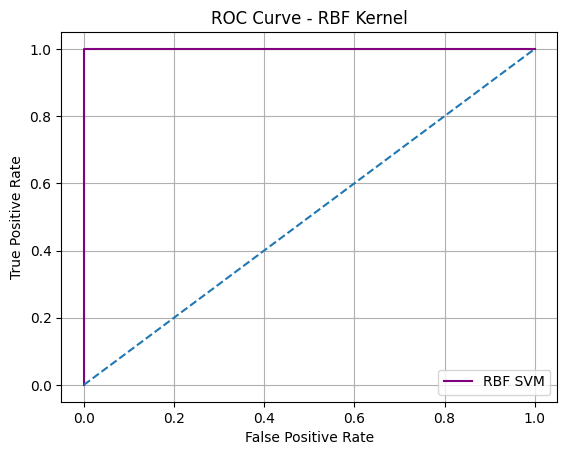

In [52]:
from sklearn.svm import SVC

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)

# Predict
y_pred_rbf = svm_rbf.predict(X_test)
y_prob_rbf = svm_rbf.predict_proba(X_test)[:, 1]

# Evaluation
print("SVM (RBF Kernel)")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))
print("AUC:", roc_auc_score(y_test, y_prob_rbf))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rbf)
plt.plot(fpr, tpr, label='RBF SVM', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - RBF Kernel")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

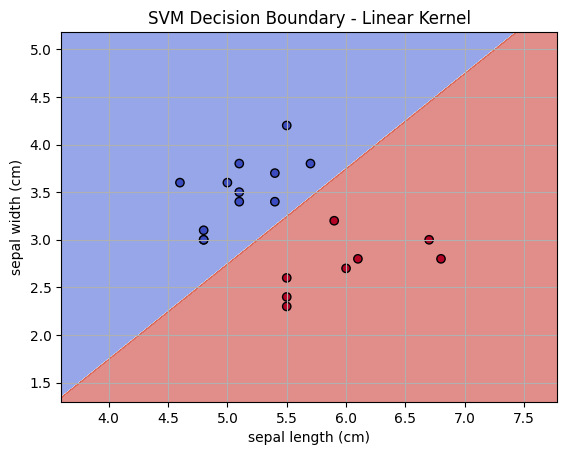

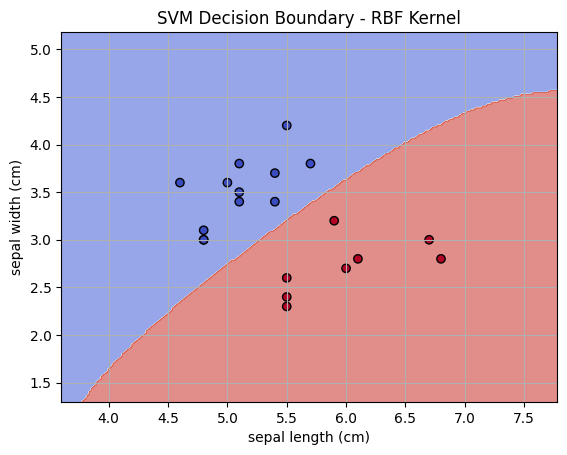

In [53]:
def plot_svm_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)

    Z = model.predict(grid_df)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title(title)
    plt.grid()
    plt.show()

# Plot for Linear SVM
plot_svm_boundary(svm_linear, X_test, y_test, "SVM Decision Boundary - Linear Kernel")

# Plot for RBF SVM
plot_svm_boundary(svm_rbf, X_test, y_test, "SVM Decision Boundary - RBF Kernel")

# **Task 3: Neural Networks with TensorFlow/Keras**

This task focused on building a simple feed-forward neural network to classify handwritten digits from the MNIST dataset. The model was trained using backpropagation and evaluated on accuracy and training curves.

In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build the neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),           # Input layer (784 nodes)
    Dense(128, activation='relu'),           # Hidden layer 1
    Dense(64, activation='relu'),            # Hidden layer 2
    Dense(10, activation='softmax')          # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=128,
                    validation_split=0.2, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8107 - loss: 0.6754 - val_accuracy: 0.9471 - val_loss: 0.1876
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9512 - loss: 0.1712 - val_accuracy: 0.9586 - val_loss: 0.1458
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9658 - loss: 0.1160 - val_accuracy: 0.9656 - val_loss: 0.1186
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9760 - loss: 0.0787 - val_accuracy: 0.9679 - val_loss: 0.1079
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9807 - loss: 0.0652 - val_accuracy: 0.9684 - val_loss: 0.1058
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9849 - loss: 0.0504 - val_accuracy: 0.9725 - val_loss: 0.0969
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9878 - loss: 0.0423 - val_accuracy: 0.9737 - val_loss: 0.0912
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9911 - loss: 0.0299 - val_accuracy: 


Final Test Accuracy: 0.9758
Test Loss: 0.0809


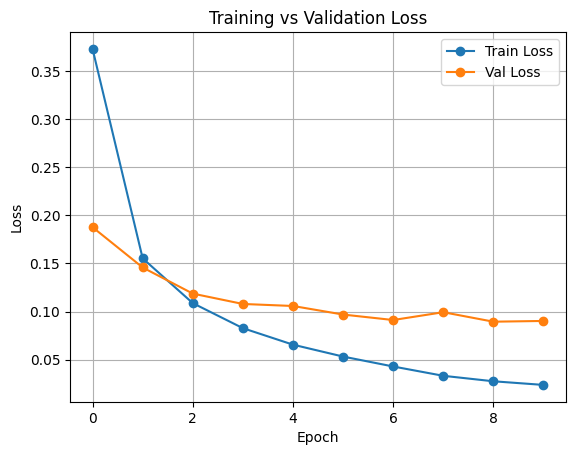

In [55]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nFinal Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

# Step 6: Visualize training & validation loss
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()